# Creating Random Portfolios

In [65]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

## Importing Data & Creating Annualize Function

In [66]:
port = pd.DataFrame()
tickers = ['ITMG.jk', 'MEDC.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'UNTR.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2018-04-01', end = '2023-03-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [67]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary
    

In [68]:
ret = port.pct_change().dropna()
annual_ret = annual_return(ret)

In [69]:
annual_ret.head()


,return,risk
ITMG.jk,0.291980,0.443643
MEDC.jk,0.150568,0.552376
ADRO.jk,0.256508,0.470862
AMRT.jk,0.419133,0.427828
MPMX.jk,0.356179,0.445415


## Defining Number of Stocks 

In [70]:
port_amount = len(port.columns)
port_amount

16

## Defining Number of Portfolio That Wanted to be Generated & Defining Random Number

In [71]:
nop = 100000 # number of portfolio that wanted to be generated 

In [72]:
np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.63097612, 0.09210494,
        0.43370117],
       [0.43086276, 0.4936851 , 0.42583029, ..., 0.25045537, 0.48303426,
        0.98555979],
       ...,
       [0.91454457, 0.12338167, 0.56911655, ..., 0.43422389, 0.16424335,
        0.19342862],
       [0.26305567, 0.79320791, 0.91486963, ..., 0.03735179, 0.26769575,
        0.18276415],
       [0.52968063, 0.57978809, 0.69082744, ..., 0.23700382, 0.70887425,
        0.86777437]])

### Normalize The Random to Make Each Portfolio to The Total of 1 

In [73]:
matrix.sum(axis = 1, keepdims = True)

array([[8.14851106],
       [7.3265845 ],
       [8.48541815],
       ...,
       [8.60089784],
       [7.84609899],
       [6.68692582]])

In [74]:
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)
norm_port

array([[0.08547196, 0.03511554, 0.02783962, ..., 0.00732378, 0.04884871,
        0.09056813],
       [0.02490816, 0.02394728, 0.07255105, ..., 0.08612146, 0.01257133,
        0.05919555],
       [0.05077685, 0.05818041, 0.05018377, ..., 0.02951597, 0.05692522,
        0.11614746],
       ...,
       [0.10633129, 0.01434521, 0.06616943, ..., 0.05048588, 0.01909607,
        0.02248935],
       [0.03352694, 0.10109583, 0.11660185, ..., 0.00476055, 0.03411832,
        0.02329363],
       [0.07921138, 0.08670473, 0.10331017, ..., 0.03544287, 0.10600899,
        0.1297718 ]])

### Sanity Check for Each Portfolio Weight 

In [75]:
norm_port.sum(axis = 1, keepdims = True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

## Getting The Return of The Portfolio

In [76]:
port_ret = ret.dot(norm_port.T)
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,0.003839,0.001862,0.004723,0.002917,0.002247,0.004155,-0.001427,0.000688,0.007616,0.003714,...,0.007033,0.002764,0.002696,-0.001418,0.002618,0.003957,0.006766,-0.001082,-0.005298,0.006399
2018-04-04,-0.012433,-0.009919,-0.013059,-0.011998,-0.013889,-0.014411,-0.011507,-0.013484,-0.013831,-0.013963,...,-0.013900,-0.012847,-0.015878,-0.010388,-0.011465,-0.016922,-0.014315,-0.012491,-0.016648,-0.016234
2018-04-05,0.006549,0.002168,0.004814,0.009085,0.010122,0.005638,0.009198,0.010780,0.002018,0.007444,...,0.008254,0.003425,0.008858,0.006455,0.008020,0.009785,0.007632,0.010066,0.007597,0.007618
2018-04-06,0.006977,0.006437,0.004161,0.000447,-0.002092,0.005095,-0.001238,-0.001038,0.008719,0.002249,...,0.000693,0.006045,0.006233,0.005492,0.002595,0.006710,0.006531,0.005095,0.003209,-0.002899
2018-04-09,0.003776,0.004787,0.008366,0.006602,0.011239,0.005941,0.006153,0.011574,0.007174,0.007046,...,0.010461,0.006620,0.002995,0.003275,0.008181,0.011865,0.010894,0.003311,0.005768,0.016045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,0.007371,0.007464,0.007174,0.009192,0.001829,0.009458,0.008350,0.008878,0.007463,0.009023,...,0.007837,0.004728,0.007251,0.007785,0.007748,0.007896,0.007634,0.005349,0.008148,0.006800
2023-03-27,0.007005,0.005251,0.007062,0.005692,0.008150,0.008088,0.007229,0.006858,0.006209,0.005032,...,0.005361,0.006868,0.005082,0.004855,0.006902,0.006502,0.008980,0.007470,0.006552,0.006844
2023-03-28,0.015834,0.014005,0.015544,0.016069,0.019500,0.013622,0.014589,0.014428,0.015773,0.013435,...,0.018199,0.016768,0.015918,0.014409,0.016822,0.018318,0.016739,0.015127,0.018424,0.018986


In [77]:
summary = annual_return(port_ret)
summary

,return,risk
0,0.323060,0.173773
1,0.294160,0.162821
2,0.301314,0.173373
3,0.341502,0.173323
4,0.285041,0.195410
...,...,...
99995,0.303462,0.217263
99996,0.262693,0.182620
99997,0.299112,0.190763
99998,0.315449,0.205607


## Creating Scatter Plot For The Return & Risk of Each Portfolio Comparison With Each Stocks

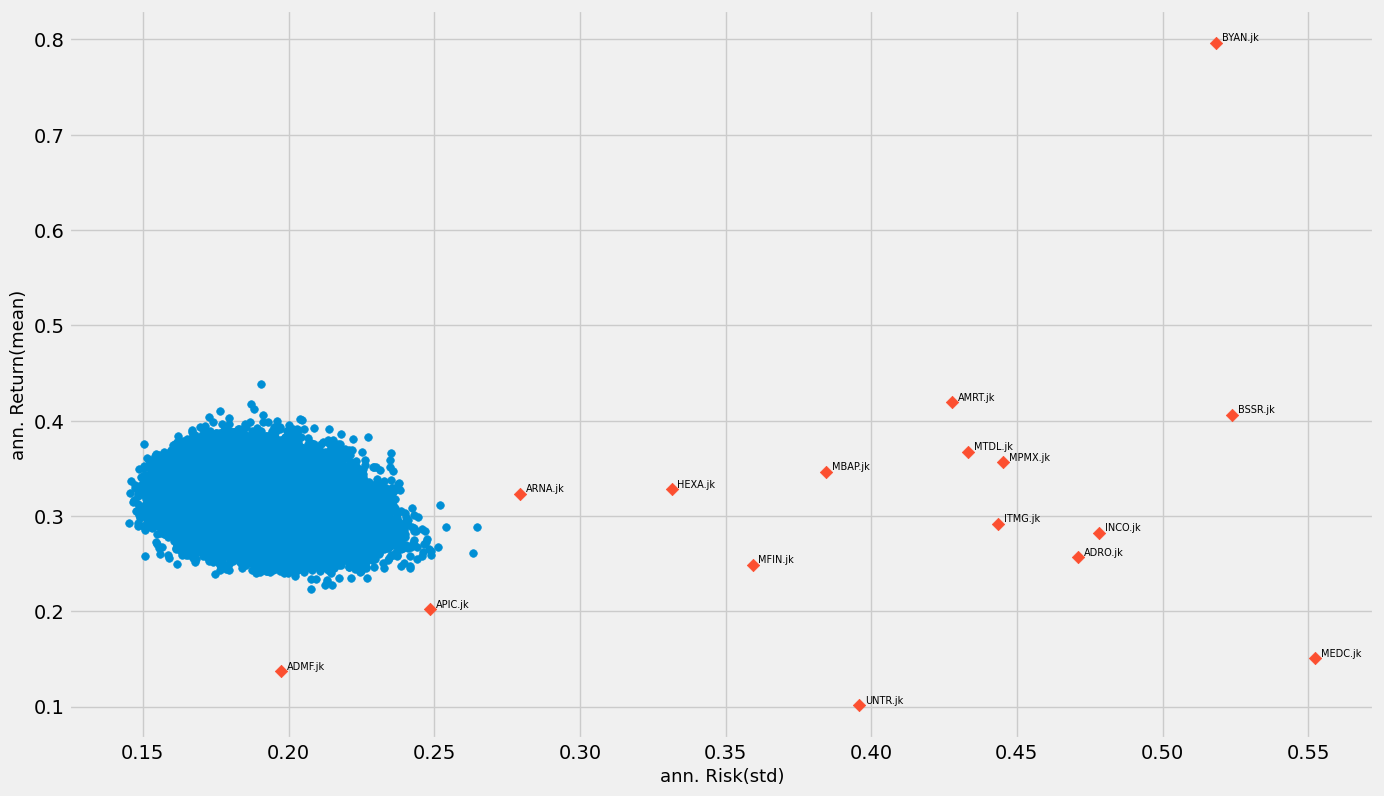

In [78]:
# summary.plot(kind = 'scatter', x='risk', y='return', figsize = (15,10), s = 25, fontsize = 10)
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "risk"], summary.loc[:, "return"], s = 30)
plt.scatter(annual_ret.loc[:, "risk"], annual_ret.loc[:, "return"], s = 40, marker = "D")
for i in annual_ret.index:
    plt.annotate(i, xy = ((annual_ret.loc[i, 'risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002)), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()

In [82]:
summary.sort_values('return', ascending = False)

,return,risk
69692,0.438796,0.190610
13965,0.417081,0.187090
87029,0.412518,0.188296
89660,0.410160,0.176407
81037,0.405843,0.191246
...,...,...
62996,0.233244,0.213362
87316,0.230950,0.213119
56828,0.227632,0.215041
39240,0.227023,0.212600
